In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Crashes

In [13]:
data = pd.read_csv('data/00-crash_reporting_incidents.csv', low_memory = False)

In [14]:
data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3119001T,190047416,Montgomery County Police,Property Damage Crash,10/03/2019 11:30:00 AM,No,County,0.94,North,North,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.172548,-77.203174,"(39.17254783, -77.203174)"
1,MCP9428002D,190047394,Montgomery County Police,Property Damage Crash,10/03/2019 09:50:00 AM,No,County,1.92,North,South,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.253445,-77.275482,"(39.253445, -77.27548167)"
2,MCP27260043,190047395,Montgomery County Police,Property Damage Crash,10/03/2019 09:28:00 AM,Yes,County,0.78,East,West,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.053780,-77.099195,"(39.05378023, -77.0991953)"
3,MCP91300088,190047384,Montgomery County Police,Property Damage Crash,10/03/2019 09:03:00 AM,Yes,US (State),2.72,North,South,...,CURB,NON INTERSECTION,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.019415,-77.013685,"(39.019415, -77.013685)"
4,MCP1119007N,190047378,Montgomery County Police,Property Damage Crash,10/03/2019 08:06:00 AM,No,Maryland (State),4.81,North,South,...,NaN,INTERSECTION RELATED,FOUR-WAY INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.059683,-77.051695,"(39.05968333, -77.051695)"


# Creating a time stamp and breaking it down

In [15]:
data = data.rename(columns={"Crash Date/Time" : "Date"})
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
# creating new empty columns to fill with time_stamp information
data['full_date'] = ''
data['year'] = ''
data['month'] = ''
data['day'] = ''
data['season'] = ''
data['workday'] = ''

In [17]:
data.full_date = data.Date.dt.date
data.year = data.Date.dt.year
data.month = data.Date.dt.month
data.day = data.Date.dt.day
data.workday = data.Date.dt.dayofweek

In [18]:
df_2015 = data.loc[data['year'] == 2015]
df_2016 = data.loc[data['year'] == 2016]
df_2017 = data.loc[data['year'] == 2017]
df_2018 = data.loc[data['year'] == 2018]
df_2019 = data.loc[data['year'] == 2019]

In [19]:
#2015
value_counts = df_2015['month'].value_counts(dropna=True, sort=True)
df_2015 = pd.DataFrame(value_counts)
df_2015 = df_2015.reset_index()
df_2015.columns = ['unique_values', 'counts'] # change column names
df_2015 = df_2015.sort_values(by=['unique_values'])

#2016
value_counts = df_2016['month'].value_counts(dropna=True, sort=True)
df_2016 = pd.DataFrame(value_counts)
df_2016 = df_2016.reset_index()
df_2016.columns = ['unique_values', 'counts'] # change column names
df_2016 = df_2016.sort_values(by=['unique_values'])

#2017
value_counts = df_2017['month'].value_counts(dropna=True, sort=True)
df_2017 = pd.DataFrame(value_counts)
df_2017 = df_2017.reset_index()
df_2017.columns = ['unique_values', 'counts'] # change column names
df_2017 = df_2017.sort_values(by=['unique_values'])

#2018
value_counts = df_2018['month'].value_counts(dropna=True, sort=True)
df_2018 = pd.DataFrame(value_counts)
df_2018 = df_2018.reset_index()
df_2018.columns = ['unique_values', 'counts'] # change column names
df_2018 = df_2018.sort_values(by=['unique_values'])

#2019
value_counts = df_2019['month'].value_counts(dropna=True, sort=True)
df_2019 = pd.DataFrame(value_counts)
df_2019 = df_2019.reset_index()
df_2019.columns = ['unique_values', 'counts'] # change column names
df_2019 = df_2019.sort_values(by=['unique_values'])

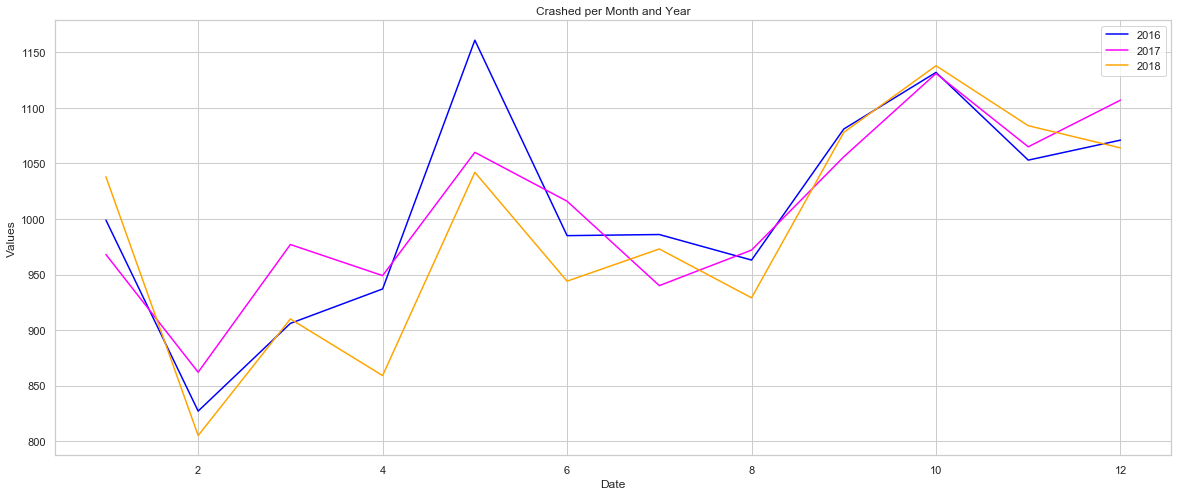

In [20]:
plt.figure(figsize=(20,8))

p4 = plt.plot('unique_values', 'counts', data=df_2016, color = 'blue', label = '2016')
p5 = plt.plot('unique_values', 'counts', data=df_2017, color = 'magenta', label = '2017')
p6 = plt.plot('unique_values', 'counts', data=df_2018, color = 'orange', label = '2018')

plt.title('Crashed per Month and Year')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()


# Traffic Violations

In [21]:
data = pd.read_csv('data/Traffic_Violations (2).csv', low_memory = False)

In [22]:
data.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07/07/2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07/10/2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [23]:
from datetime import datetime

In [24]:
data = data.rename(columns = {'Date Of Stop' : 'Date'})

In [25]:
# import datetime librarby to convert objects to datetimes
# from datetime import datetime

# changes 'time_stamp' to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [26]:
# creating new empty columns to fill with time_stamp information
data['full_date'] = ''
data['year'] = ''
data['month'] = ''
data['day'] = ''
data['season'] = ''
data['workday'] = ''

In [27]:
data.full_date = data.Date.dt.date
data.year = data.Date.dt.year
data.month = data.Date.dt.month
data.day = data.Date.dt.day
data.workday = data.Date.dt.dayofweek

In [28]:
y12 = data.loc[data['year'] == 2012].month.value_counts(sort = False)
y13 = data.loc[data['year'] == 2013].month.value_counts(sort = False)
y14 = data.loc[data['year'] == 2014].month.value_counts(sort = False)
y15 = data.loc[data['year'] == 2015].month.value_counts(sort = False)
y16 = data.loc[data['year'] == 2016].month.value_counts(sort = False)
y17 = data.loc[data['year'] == 2017].month.value_counts(sort = False)
y18 = data.loc[data['year'] == 2018].month.value_counts(sort = False)
y19 = data.loc[data['year'] == 2019].month.value_counts(sort = False)

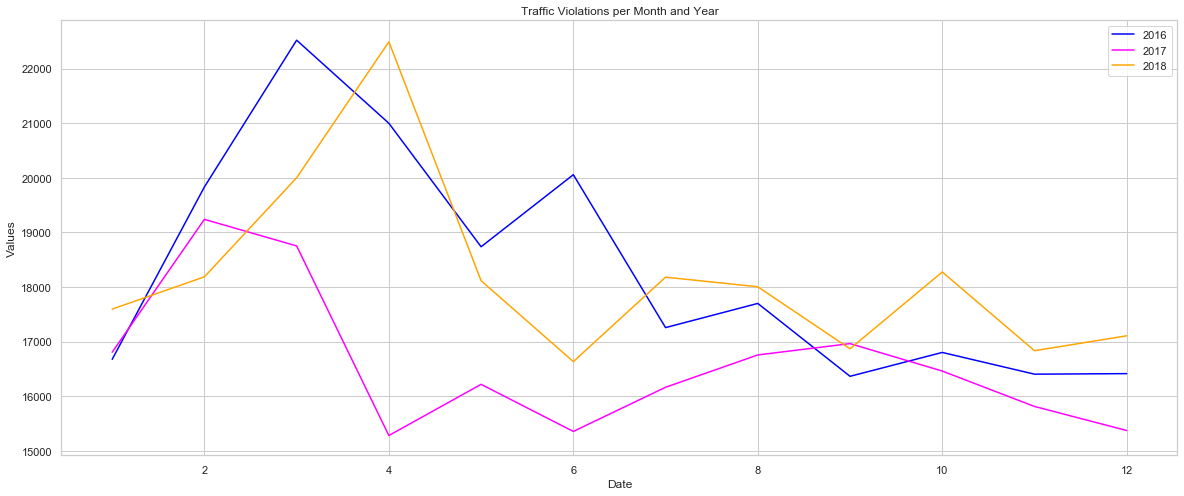

In [29]:
def plot_easy(y16, y17, y18):
    plt.figure(figsize = (20, 8))
    plt.plot(y16, label = '2016', color = 'blue')
    plt.plot(y17, label = '2017', color = 'magenta')
    plt.plot(y18, label = '2018', color = 'orange')
    plt.title('Traffic Violations per Month and Year')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    
plot_easy(y16, y17, y18)

# Crashes vs Violations Compares

## 2016

In [66]:
year_2016 = data.loc[data['year'] == 2016]
year_2017 = data.loc[data['year'] == 2017]
year_2018 = data.loc[data['year'] == 2018]

In [67]:
#2016
value_counts = year_2016['month'].value_counts(dropna=True, sort=True)
year_2016 = pd.DataFrame(value_counts)
year_2016 = year_2016.reset_index()
year_2016.columns = ['unique_values', 'counts'] # change column names
year_2016 = year_2016.sort_values(by=['unique_values'])

#2017
value_counts = year_2017['month'].value_counts(dropna=True, sort=True)
year_2017 = pd.DataFrame(value_counts)
year_2017 = year_2017.reset_index()
year_2017.columns = ['unique_values', 'counts'] # change column names
year_2017 = year_2017.sort_values(by=['unique_values'])

#2018
value_counts = year_2018['month'].value_counts(dropna=True, sort=True)
year_2018 = pd.DataFrame(value_counts)
year_2018 = year_2018.reset_index()
year_2018.columns = ['unique_values', 'counts'] # change column names
year_2018 = year_2018.sort_values(by=['unique_values'])


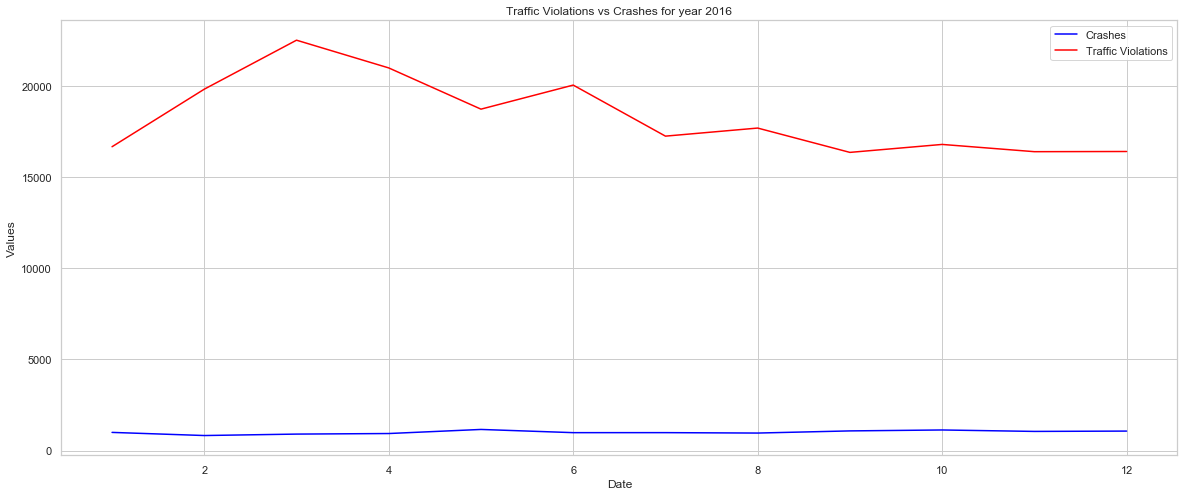

In [48]:
plt.figure(figsize=(20,8))

crashes2016 = plt.plot('unique_values', 'counts', data=df_2016, color = 'blue', label = 'Crashes')
traffic2016 = plt.plot('unique_values', 'counts', data=year_2016, color = 'red', label = 'Traffic Violations')

plt.title('Traffic Violations vs Crashes for year 2016')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

**We have plotted crashes vs traffic violations, however since our data is not normalized and very spread apart, we are getting issues**
**We have to normalize our data the replot**

In [169]:
tf = pd.read_csv('data/traffic_violations_month_year.csv')
crash = pd.read_csv('data/crashes_month_year.csv')

# 2016 - 2018

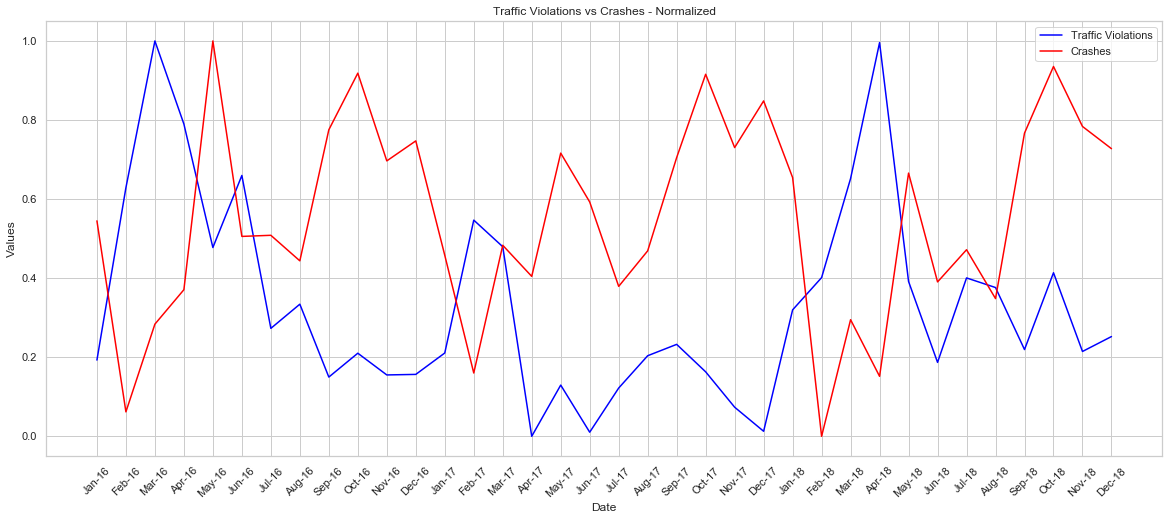

In [170]:
plt.figure(figsize=(20,8))

tf_all= plt.plot('date', 'normalized', data=tf, color = 'blue', label = 'Traffic Violations')
crashes_all= plt.plot('date', 'normalized', data=crash, color = 'red', label = 'Crashes')

plt.xticks(rotation=45)
plt.title('Traffic Violations vs Crashes - Normalized')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

In [175]:
crash_2016 = crash.loc[crash['year']==2016]
tf_2016 = tf.loc[tf['year'] == 2016]

crash_2017 = crash.loc[crash['year']==2017]
tf_2017 = tf.loc[tf['year'] == 2017]

crash_2018 = crash.loc[crash['year']==2018]
tf_2018 = tf.loc[tf['year'] == 2018]

# 2016

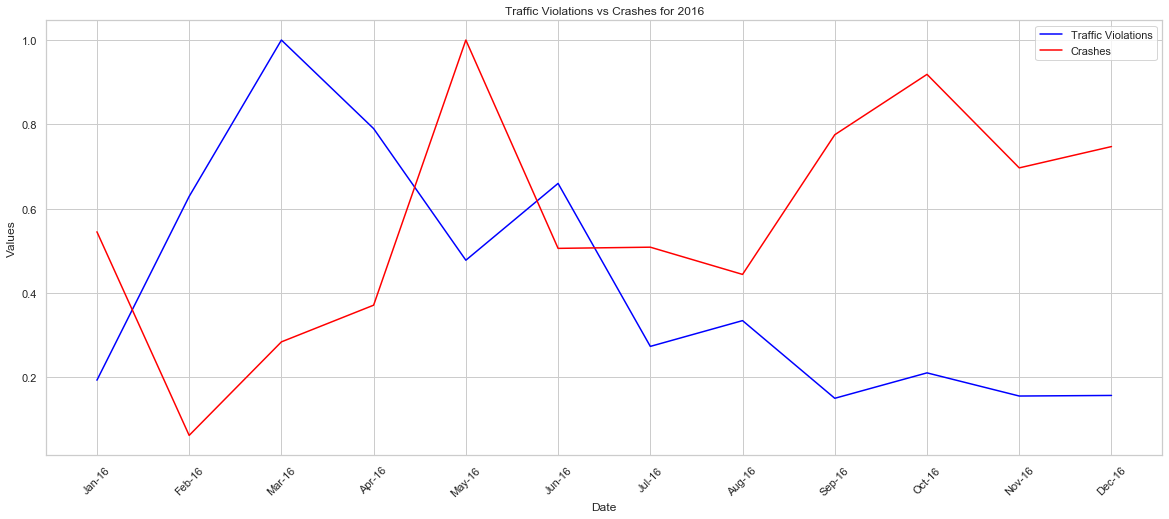

In [176]:
plt.figure(figsize=(20,8))

p1= plt.plot('date', 'normalized', data=tf_2016, color = 'blue', label = 'Traffic Violations')
p2= plt.plot('date', 'normalized', data=crash_2016, color = 'red', label = 'Crashes')

plt.xticks(rotation=45)
plt.title('Traffic Violations vs Crashes for 2016')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# 2017

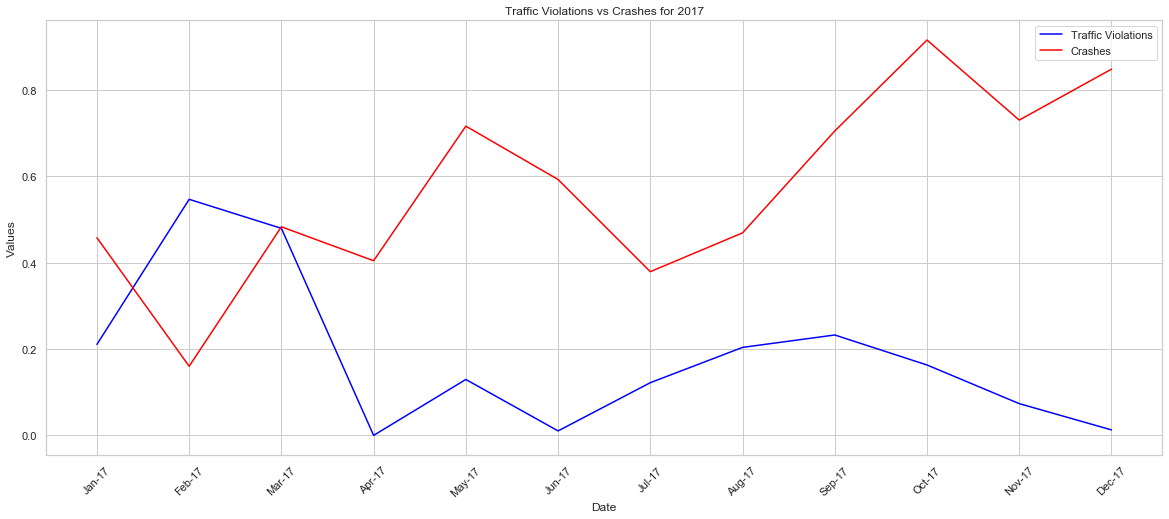

In [173]:
plt.figure(figsize=(20,8))

p1= plt.plot('date', 'normalized', data=tf_2017, color = 'blue', label = 'Traffic Violations')
p2= plt.plot('date', 'normalized', data=crash_2017, color = 'red', label = 'Crashes')

plt.xticks(rotation=45)
plt.title('Traffic Violations vs Crashes for 2017')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# 2018

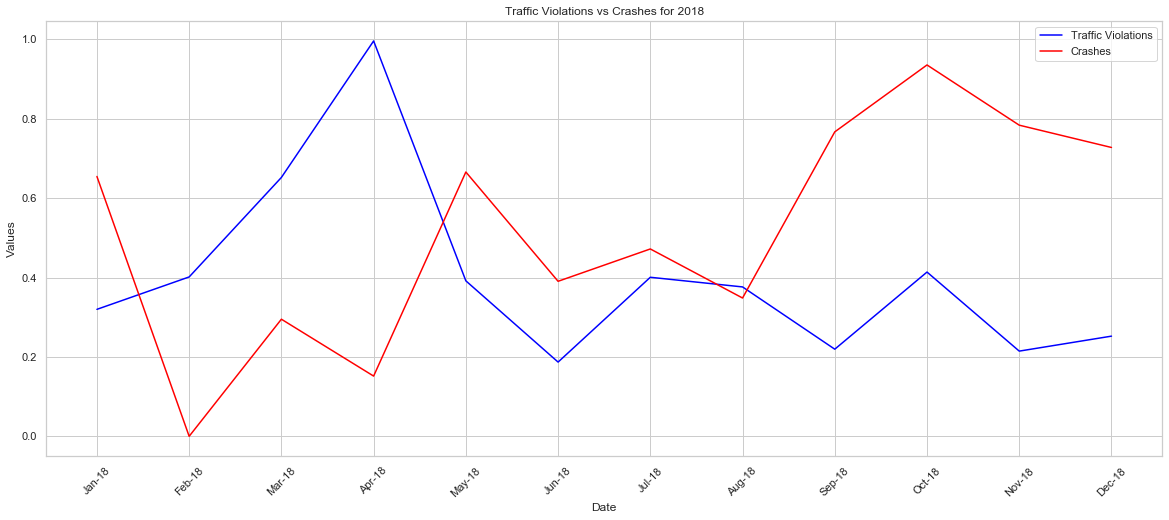

In [174]:
plt.figure(figsize=(20,8))

p1= plt.plot('date', 'normalized', data=tf_2018, color = 'blue', label = 'Traffic Violations')
p2= plt.plot('date', 'normalized', data=crash_2018, color = 'red', label = 'Crashes')

plt.xticks(rotation=45)
plt.title('Traffic Violations vs Crashes for 2018')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()